![image.png](_paramswO59XJ/3b/Mz/beUi5nfuCDgCjoAjsIwIDFYJky4P31Ph80iWhwvni/C+ubz+lbkivGg+r56Xra6fP1cs/L9oSvNF/ZH5vPpbSA6iNRXh/GPL6qeX8aK8K0fAEXAEHIGVhMBcEV6WleEuFURnH5Ov/Zmj1qx5Wl8MfvKXP/K/oCVlRbhW+zj/uXn4l32P93aOgCPgCDgCjsBR80X48yhE6vOOPuHj//eBQpLl9UtUuO2cy6tXH2h/frwj4Ag4Ao7ACkAgK+qviDDK63La7c6X4Vfn8vCXWVF/7ph84ScntT/uuDX/XVaEmr7n8+rNk9r6PkfAEXAEHIEVjsB8ET6vAuN506Cg5ETUogIkh5tYF7PelAOzPLxXjivrE6Y09d2OgCPgCDgCKxGBLA9vRVDMlQs/Ne3+sxPXPYO2aEjWNitEMF1vvyctsyKcwfHHnrDu/5rUzvc5Ao6AI+AIrDAEyNQtWktRnXL0CWv/j6wI12RFeHA+D/9fGxTzefh12qe07rmy+j22zeWf+GfNY9impsCNc2W9lv1zRfXfEGLNtv7bEXAEHAFHYAUjMF+EPyWGCAikAmwevjlXVu8XAVOE16TQZEUo2E5Whn/165/6xwgl/EMEyGZluIc/hNr4MfVFWRHWq7nuCaGNl/Vz6Sc7sTo2bevrjoAj4Ag4AisMAUxzc2X9XG47K8Jj83n9B1GTCYNjTvz4nG6/OivCpmPz6if4/YL8z/+HrAhbqQ7Lb+KLsqJ+NCvCFdRC+olXn/U/ZUV4ICvCWeznn2lTmZIkIDbMF+Hv2Qfzbr6oP876savrn/MCfwKZ/+cIOAKOwMpCgKJ6WlzvXVkRth/9mvpfZ0W4OCvCvceWIcvK8Ivzef2CuTx8a64Ifwc6KnAGx5Zr/x2/kxLmg/mifrFsK8JCVoQbWEfoqTb1pwTQokVppdl9+J+yIrwjK8KtRpBwSjio+T9HwBFwBFYYAjDixGQWy4/fCm07mtAgLNRvkfW8LglmjUKlfsV8Uf1y3B5eB1zzZZXL7yLc929OXPu/si0rwuWkFlLt6ZNZER7R7WhbAzKFqznw5mNWr/0Pejxph+6gCu0Kewx+u46AI+AIOAIgoHTtR7IibJgvw28hHI5dXf0/mM9kW1G/Qhh1ZfihCo7dc2X41LN/9cx/agii+aTkBtIIZXm4TtvvspIUQikvw11SuqKsvpDl4Xvzef1HWVFty4qwOyvq91ifvnQEHAFHwBFYYQhALogZFOpvRAFS33hsvu7H2mA4Jl/7oz+x+mP/J/sgM8yfVD392OPDv8CvhIBCKFGWQo5ds+Zp9GNaU7M/NdshCNGMzs6KsAWTYbOd/3YEHAFHwBFYIQjgC8qKsA+mG+sIHYgOc0V9IsX3sqLG5HZpVoTrJYt3Ee6PpIawSxOn7lehgmDZp9t2RqJDdbcU7SvCd7KiukBij8r67XNF/aps9cIzIU7Mv2btc+aK6j9lRbh/hUDut+kIOAKOgCPQhsCQNZeHb2ZFuJkqsENTW2TLXY8wIXYoK8N/FhJCXr9xrgyrszwcP5fXv0CWbzHx5dUryQAeyQr1W4hhEjp5LHF+6Xxefx9/kgouBNgm9TfdmxXhS23X59scAUfAEXAEDjMEMIdFrSW8LyY+rT6TFfV5QqHO6z+AHLDUS1btZQDRAJYbFG/YdH37wyyHCa9f+8Eq2otmlofXIYhEAOaRJNGvj1GrY1/32X9CVnJ8Ufi2siKcm5XVJ+aK+r/gk+J+8FmNjvA1R8ARcAQcgSUjwMAanf5SEM9MZHeoILkhK8JG1WoeIJaIINVZTpbl1Svx4cxyDG0pLzGXh7/Wc+/FHzVrH5IFXM49WDXLscQrEQulhAi0rftjDSYSwwpJgm1bsiLsxXxILNQs/XtbR8ARcAQcgQQBiQuKprT9lh0b8gClw4kLgv0Wmw9Wzedr5ymMJ+YwKSu+8Oykq4mrUmCvCPu7yAxdB6OJYHaDPj5XhDchmGDodbVv254V1SkW49S2v22bCtAdpDbChJiWx1AB90RWho9y7DH5ef8oK8KpXNtcGf5rM4NEW/++zRFwBBwBR2A0gF6u/pbt5JRDYIjzH//Ma9Y+hyJ5RjDAZJUCpzFD5KF7rG/iUkxoIsjy+iVpX1FQ1Z8TOnajMB/xQpAbMI3ZMeIfKsNn7bctERhiRiurP0vp4uyP2cXrb1jbact5aOjCzKsCwiZtP4yjKuqvsJ2gXuKmELQqqO6M2lL9fYRTeqyvOwKOgCPgCDQRQNiMyjoMsjx8WzIZRHo0Zqg1HPLc8i/+jZrK1jW7wGQXBVp9Y3Nf12/JQZfEAcGCU9MXZSX2o33Zsap1XEHuO0gNpAxiH1pJvKb6ndaWfZFWLoy7Dc1kqipYTx21716LZjph8tWLWkUhfSvXbD4jK6WhON2QFfWNur5/Pg+/s6gP3+AIOAKOgCOwGAE0ITXBPayD6J2YqtCI5k+ofhwNhRxwsq9c+6xmD9C343H1W5r7xn8PVkmRPcm8XZ9n+2DLcTy/h7noiuoU+V1WL2ffT64O/0pz3906X4S/YN9cEd6Nv4t1rpUcd8N+NKuDZWNQht/jkBF61VGKhQPvpe/mv6yoXiv3m4e3ooWhFSGY5svqN7IiRAzLcI8E4q5eeGbzeP/tCDgCjoAjMAEBjc9BK+Lv/KwI60jJw28r4YBGYOvNrlSgbZ5IchCNLNxFn2hV1odmWriGrAuSLqis304b0VLy+o2s09Yyf9tvSy2EsIlxTOGJrFx4KQJO4o8iwUBKWpjvimPnivDHdu625VAjLBde2rafUhb8xWuqrqTPrAw/nCvDx7LohzMci7bjfZsj4Ag4AisSAdFy8AWpqasLBEmxU4STITGQHVsGWRFO9efwD2ni0luyIuxAADT7IYsCx8yX9S8196W/oU2P+g5fUp/SfnLRzRfh0+wjQwPn0b/daD5oOmRmoAyFCZS5IryIlEMaPAuRQLQfuY68el5WCF39orm8PoYkrnre+6fRzLOiCpgV0+u2dRVslMP4GuSOuXzh2VxTck/3so/sEBOF81FHHcW9i5/OOvelI+AIOAJPNQTmivAaMV/l9dezIjykg+W1mmT0Cgb057157T9su+8saiQErG7PiupD6rwngSmDsAiq+aL6+fZjJeB1ahE88VVRy6gIm+fz8F29vndk5cLRVJKlbwgTBMQidNrOZdvEh0US1rx6JdsQwHNF+H0xocXgWLI9bFSfzn4Sudqxbcs8P+8fZEV4HI2rbf98UX9AA3ph3QmbjiwQmmViZ1aEnV3sP4SXxnNdrP1AFR8oBpgbz81aTKJt1+HbHAFHwBE47BEgoDUO8FKkDtPRuTFljzj6+U1w6B4G0LabiQQDyzUnqXsGWVFdeczq8G8JSCVLdko6SPtQH8quNg0qbSfF9YqwEwE5X1R/RTwTfUNgQDtCy5orq9+MMVES/3OBmsK+I2mFYjLVqyQuqay+MFeGP0EIzRXVr2Wrw3FoUggqYbwVoeaeNZD1oSZbLr0u1ocZwTsEg2SYKKtPcI+SMaIMP4hEjKFWec4wx17SObn4VKDfnMWJAs/i9JilPGxhnwqmjU4XT4DzVUfAEThyEVC/zwePycO/Z6AkoJS7YdZP2W/WNdno3kl3ieMfAgLCLG0nZrA8XJdus3UjN/QiDUhG7/qTMc6nClkRbteAXAZqzHQbsjjYX6VBuedQiC8rqtMkT11RfWa+CF+ESRd9UCJwH5eaS2JqJGC1uhJiAdeDltQnmFbjiNbbPaVLNWvuQnNLtwtWeXVSE6u0jZkqzYyHxmZ0cC2/8YgkkUUwFfUH0mN93RFwBByBIxIBETxFeBOF7tAMuAktTLfbNBfo3KJF5eHCaSaxJghaNmKLDazN/QSQ9hr48/DWqMmFJzDhEWMEGYFifSZEm33LvaxeeGaXD4hrggiBlkPwrGpFt+l5xDfV1me6DdwQdOk2WycRLH3N4vdBI1PmoBBEuD/6QwukL7QhzKeY+jBXZkX9DeKo7Jy+dAQcAUfgiEVAHPKSwibswpnPjYgPRbMJKD36MVh0KrTQSK4leWmfm1bNa9CVaSEr6osww03rC+Gopiup9jqtPYP2XB6+qsJlv/maph2n8UTc4xumtdUg4M1ZWb+9rW0W8+FtNyp5Wxvb9pzjP/7PyQyRpFqCtXgzlXOtTaSIx/Ls+PWyQtI1DTBpWhtfOgKOgCNwxCJwTL7wPzLwWYocSoMziEMS4KayvP5dzFoMvvwWploeLpSBvgz3zBXVb9NHFwD4QsjZRhaDtjZS86hneQdo3pzXtAbrD6HHgG6/WZpGoSw3Sc9j92Dt6AeCgf1mqSa+Dem2rvXoPwuDbPXCC9vaKLX9trZ9tk1SMJWhimbHahsZyC2LBUKf+7U6T/i9wJJjrVKuBSNbf750BBwBR+CIRmC+qF/MwDdX1m/LikBC1GG5hWhSqz/evEGybpPNW2sMSZoeG0ibbdUBL/E9zX0qAPdMMrulx1DJFeJF3DZYhQYhwrEID5pzn6VkdyjDXbST9EDRTxSsr1FALXFG1a+xXUkY2xHC1m7SUlP+7IOO3dYOc1qnOa8IL4LurdeOee7kRabFmOEBX9af079OHh5Txh2FAze3nde3OQKOgCNwRCOgmsoTDJAwubgZy83WzPGW3mgsPSFF7LTCav05fCdpG6GUl9UX0m22LhqCnHOcDGH702VMCyTZxQcIMM4tA3pZn6CEhtvFB1PUH0AIYiaECID5zUgCaBYmgCV5aiwLcSfnUYG8v6mBpdeQrsP2w4yWbkvXyfJNAPHYNq7VSqjn4Tr8YOn+5rpe0w7o5ezTSQCBtfd00cWbffhvR8ARcASOOAQ0W/eDaB0UttOKqvhTzp1W00gEQUyFA/sNv8Zfo0EAQlaED2IWZB0iAZkNSC7Kb/wrBLTC0JsGmNCmRdORGKf3ZXl4b1aEOzEbUnBPi+qtE9JDHr6lGs8ATUXjhRjIKeT3QCZmx/qdURBX2xjcxWdThP0M9hw77XpiIG24mnZyrtXhODN1QuUWM9zqhReyj2sUrS1qahdMI4eAU/RBDXPcnaH3vzkrwsK0a/P9joAj4Agc8Qgo5VmCODXzAVm9ybiAYPoOReWm3eR8zCcneeJUGzgfjYXjxJwmcU3hMesHSrOZpWxb25KBfZTlQOoK7YC4MFdWf0ZQLrFInIdzmqN/Pq/+I1kh6E/THZGB4VaN57lKKe2Py3Em7HomN8V8iM+HviVINx4vpAvN9rA7K8hILtVnoabXmDrb7s22kX9P0xoRoLx3FAisdZTy+uuLTHt2sC8dAUfAEXiqIYDWoul4biZTAPeHmQs2XBRM1d2w1oizmXTvMcA2EA+0D0aYsc0IltV+XgtDDc2hD9OOc6kzXzIWiEmsrH4P7UxMf6sXXqiU9VPFzxJrIp0uOePE31WdIsG1efh1Mkpwj6rJEPwLkxDN7i8n3ZPti+bDgLZyOZqMZrVAG5MA4kSbexgtDPOiHdu2JCuDXifZG5gEnC7aVvQjPUF8lGlfbcf7NkfAEXAEnrIIWP2eZgyNagJQkvcSw4Q5zlhgXWBoPM5OYoc0C7j6m0TrQvPi744mC66rP9Ugtoo/JWYx2KQBrlSs3ZgVEvR6MxqdpB2KZTKu1XISaEgm0HYhDPEzaTmILQiGrvOm2xUHq5Br94BJkEwMmCgRcncguNLjmuuYLrOYKZw+7odJ1/TZKYnh/uax/tsRcAQcgRWBQPSxhK1dudKoCCvlEqI5aj+JTieRAchurYJnNHjjyynCggbe7ptmzjLgNTEr+fMeEJNYHl7HsV359uy4dIlmFNP+1O8kQWwMNK2/nraZtK45/BCK71CzHFpNem9oS5/r6gNaeixrPsxNV7QltMX3ZYzAPubSrvP5dkfAEXAEDksEov+kfs+ki6O4XSzDPb2QHiy2kRkuXGr+m7T/rAhXiVCSUhEiBBi8L7M2mKnI6mC/Jy3NXwM5gnaY60jPgx9JEo4WUuIBDQnT4DX4YSj/oJT2y8jIAAlCfF1aal3z2/3dpPOm+5SyfbltU21x+zx1lSLZYisECtvPUoKMJbtCzBOIebArhsmOiwlWoymxi1ZPWyYInG+aRmb9+tIRcAQcgScfgVhjiIBWqc/TdkFQqiUzQhE2oQW1tcGxjmaTBpZqnrlY70eIENVrLWUQGhTMO/pSvw0CaYOlJ9KsCg9Ac2bgbjunbdNzY3rD8W8EjC3ck5IezhZ/TGTUYVa7E/JBNPFJ3BJJV4n9gWjAdSC4dmdlqOwcXUsNZKX67G6LV7ISEymmIqDK+gT6Ub8XZjxMnJg616WmUKnb1BH7JOxA0S6rAC5d7D80We7F89p1Pbnp2wkTICkw2Tqmt/YWTzYCEKTML32g10IsoZOFDhTFJRwvJAIZhKvT2g6HqEDWBg14fQLhkbbjY5WZPRqPmajy6ssMytZOMiqU1Rd0/0OU5Na0OA+Ln0iE4sJLMbNZfM18Xr1Z20OAeBxtZ5JGINTxKGSEyt2lGUjphzx8064tXUbBKNrUIySS7eqDY9BkklREYp4zYcxHAYHDqOwIG2HIlVVOtVq9LxHuaDJ2DZJtfMRgxMR3EYLU9tsyy+tS+9jTVfBQy7FTomMv1XLt2CdrieBcrsHiYN8DwjzGq1mG+2obWu7BPq/3PzsCTHBJm6VpzDYS9D57L6MjNM7vUoLMCXUZ7fG1g46AaibCJuuq8yPxMkXYK4lGW3K0YdqyARbhpvFKzMw/0rwBKSMulOyAr4VBfFfXYIlwkn7z+iVKWoCogLD5bDPQ1s5jprtU27B9LDW2CA1oS9fsJ2bOrralx6Xrmr4HQgT93KDBwu/IivBIFwlDzHaRWbhXzJR5/cY2zUaZfbdAEVchv1HOc2J1bHoNGkN1VjRHhj2WkSJtw3pWBD6sQdYRhNxsv5y/CRLmHmL8WbiOjOtq1ryajOjTWIbLeS1tfZkm3twnk4c8fA9WJOmnNBkwJVTubvPpNY9Pf09jnaZt29b1PSD/4iX6rC/hO2wOulqahInOJZLBPq+/zjvX1uekbYfjhGEqhmvWPE0ncnyPOwmTmHSP0/bFgPn6Ub4btONp7X3/MiKQlfWHVfNBOLSWy5Z4nA7TFQ+flwBtxjQbq/zKYNQpbF732X8y9DGpGavttjQWaA37+FjUNyWBtmKK00BbO5Y4IGZK9ru5JLbJYoAoUd7cz29NHrsj02SybCNFT9TqtGpsHi5MS2RIctkinNPWH9tiuQsxny0S0naMCraH8a3Fc0Y2ntRvKqoLrF1zyUyOfHvN7fzW8hrCYOwS4m3HLcc2BvNkoJBkuph+SYmkwvw+JhDLca5Z+9AEvw8u1j4HqyIrchxPfKzzJ1Q/Pst5NHfiQ12FGvv0xTdFVeGhGZry9uXaZ9m3lvah8XykjyLl1+unmbnTY1mPRSIjKai578n6rXGCD+HbnXYN8TsJO2e977Z+Y5maMOhLqmrrw7fNiIAmOcUc9kEG/rYBWnwZ+CFOqp7e1n2ScueC1M6ugqOzHDnsO2GxoRaX4VNtfbONAcOSvKZtxgJti3Ars8H48lbbmrNHO061ii0iWDApFuFvbF9zmZHOpwj7SOOjzEFo4XvIhN58SU0Ak4Ov2Y/91owP2wnQtW3NJeY5tMZUiMf7FLPR/V2MQR3gW2eGSjX/kpozLm2e82D/VgG0LyvqR1ONZGQmJqvFYNXBvo5m/1m58FIViuen+yydlJla032zrlO+hHP0CfCe1rc+x8F8Xp00qa0QjzRf46R2bfs0MHxAIcu2/U/GNjNv98naIiEdRdiyHFqeCaS+IR9PBjZPuXNqrrodMeC12sbH2LxJTauDL+MrrXnSRF2WjNNS44d4GfohvigrwvrmIIpPJiYErb8iAaRF/ZasCFub7ew65sqFn+KjbgoB2y+BtiPfFCr7JV0zpFhBNgxE01odjqNfCAnWV7pUn080ERbhkUmBrLEGUeiscqszXEqVr+acULUZqNPzsS5Z0zHr5dUrRymWhCXYep2LNMbEZ2d9azzVF7XvwaH+wLR0h/gA01gq1ULFVNz1bO0eDtYSjaBpDtLSKwMKRS7HeZl4tWkzs/Y9jEvL63LSsSpQe5VjaesHjbXLlN3W/mBvw6w9KXQkPb8KpMcm+X3T9pPWITPxrS7XezDpXCt4XzITjdH+j5ipB4ZYWzkIcRjm1auhSvOANG1NkfpKYraG6kqATfxJtP2dJtg689gRB+b6F5S5J4N0s639RrBh8rLfbUu0Ig0WhWG3i2DbdPDVwXtLaqIhKNZYftYngmCUiihcQ8aFaTOu+bz+/iQfjQ5yEsSqJjT8EduYzdp5bakfFYJ1gP/A2IepP0Do3EWgfAZZIRB0n0LoWR/pkvNhOmUbDMb0/tN2B2tdk93CXHxk8eCv2Tk6SnUsxzVJMPcMZAT11exfjnMvZx+8X/qsxyoNN88xX1Q/bybf5r6n+m8JeF82DUkqULtAOlgvDfZvBk6T+MQF8YJbkbyYzHSyEzRmEAjncxwmPgSObhswA0fLoR8RSgSmNqjaWp58D4MklG8TanEQ6I5tmivCu/Vj/Ni02ZIkg431mu7nGGaWqmUtcM3poKiZJ/YhdJR0cGs8JlzeJiyazwYTp6VOwifR3M9vLQ+xz+jgmqGCjA3XEwTbPCY7sTo2alKSy+9r7Nfs5LfrsRAZoIk/hvY6LXVQVoSLIRLQjwrsLaaNClkl7x/427zWPr/Vx0jG+A0piUNNefgt96WEDAZUhGZWBHwhZzfj1wRPNMiiwkT8k+KnieVGvoRmObom8QVRxwv/2UNZXr1LUjnldYnGIv6SvHpXVoxi7+R9KAOsxP36Dr8XZp36Mc7Kivqdo/7jmphr8/BWIfwUgWwlBf2DMc8rpqWq3jx+3GCVmlkhKpzeRyPJikC6LSYqrX5e6180JHumWC+iheEsMR+eWB2rJrCLOX9qKuWa1SpwMow1+suK6rWx6GP9FrKFmCYr+SH59ov6A+l7P19Wv6FFImveYbsm7i/GMFafAS9lsZ1rLgKYs1LtWZ+7JW1Wa8uLxP/a8BXL9a0Ox8k7TeJn4vfiBO0+Cyux83ONMmkrwtfarEDS14nVsTxryc6S1183VnGX+d/69uUSETAKtb0EMNVge1l38WHWb7Hfk5YS31IG4m5E07Gs3eoX2GEDXrMPcrrhS2hu14F2YNe2aL8QJzSRaPwoL2sOVM1jhPJchGKUiJSPueGohlhhZR/I6F2Ec6axahBosPD0hRVNZtKMNCuqM9GG0sGYazVBjg9u8bUfdRRmPQYgNAx8SjoYcb47YH2lgrXteNuWFQFG21n8toDabHU4jt/kJJR+E9q5Hbdcy1j1NpCLb2NqSlG/HBObT9u5NEPHRoQMAkMF04BEudbGTI+Kx/kRXxEECLcBzDjaquYdGYaUdid1lORHrD+C1jl6fvVXrG+NS+OdxsRIpo7zmdDYO9T0dUb/YviuTmh+Y6ix5gvPZiDjXeeaUrZpfAbVlTxDHbzx2Vxo19C1HGpIHUQcOw4GKKEI/NYQhrsFqzxcp8UhyYIiEy+Erh2nE4ThhIztIvDR/kVbD1+1gpe8P9JnGSoEjExE83Ahz0n80lo004LAzZ8sYQ9F+KKSqHiuvykTSIkbrN8jsXlMLtSHpaSQaC0o6hPtWlmqpeVSmcAU4WWJZeH2VNBqyq5zNItKvL/V9fPTvvRdvIHzkXjZ/HVYWlwgpUgt47rmZZP4HH2gm2wmJL/LcBezjVlOyUvMzAm2mZrEtk80XUUh9njzw+acOsPcYS998zqY4eqH9VY1q/Ci3oyTd5qNPiaBDZ/XUuDXM1tUtp2kGuK+p95BdHUAACAASURBVL14zOJlNqaBrDKjiyXDB10OcH25FzmilQ11RySSLPbbce/M8lTg14KPlKqIQbVNbCb9jgHAo+cay11YyXPJVNFJPJnUb999iUB6EFOjZs/4jA1ypkVrHSkG5+PTvm1wSJ35Vv8pne1aIHL6/qlQwly4iMwxJOOU1Sca5yOWbke6zQR5Gu+VTCheYW1lUC/rE2xChoah76zEL8VvRAgqSTYSyfw+YGC3ftqWfQVSzFQfkx/Tj1V7bhIrskLYomMEAE18PKDUjF0DWpHcQxEutm2YktPEx2amZ0LJn4ZFSIB5NHeLRhgz/Z9YHUvAqT3nuaI+kf5N0+KZpQQGnXAMUpYdz4FjaGvXhLWFOmTkfjTLi07C93NftCNOkeNSQawhLYMm21PNf/unjQvD8/vKDAjEhwVVGqbYFVZmG1aN9ZIV1ZWYhuw3s5VpvhNry1KJCt/Q2c/VXTnW8AchHNNjWVeBRnaE27viCHQWJA7byNLTGT4zrLx6VxcT0M6VzNQQZvdjRksd7dYuXeKbUWGJBoXPZo1oSasXnkm28qbWZcdaafW23HWYMCLDcFxj41gxcXEvlMwoApkmxor5Wf9dyzS6XIXaFkwp1l79Wder1iVZxJuDlbVdjmVislsfzVv17wpRRrU0zoHmpBk2tvMepedVnwjP6zu23Yg2DIy2LRE+19g2nX3vNR+abWcp2TVE266GFYPZrgPRjvQ60JrjQFavtT5U89xov9uWJvQwObMfLRkNL22rYRdTfRUj1tfk4o06cRONmPNo6RgmRWNmw2FAd6Idq29yUcwa5lHu3whAhENYReVoMQhb8MViitPQCMx+b4KpapNFq4SM1pbevwl28ROPmVxjK5uomEUEFwPXgoUn7Yd1Db142DQkzN9pIL2yijn2o7TXd4Z4yJsW9RWrAgxcIDWRWYbfOvhsxV4uswhJn1M/arNTTpHxABJKclaGu9AC0tOTmQBGWbqtuY46b34VzCK8pGZesvILKdkgPV4/iDvRZNrMd2pWuB9fmAkSFa6nq3nkQbI5pLRp+p8vql/WpKX7+HD4bS9tev50He1GCQj4P25F5bePi9kcgtdMI+lxDK5ojfLRJDPNtA3rBIbCLrTtYKJZz9HadiAkzL9nbdKlTgDeM+5/YCYqM3CJ27KJx1i8VMzw8CAfJRqmzjavT/teznWZDReBe9rcNFvaefjoBa8iPGAY277EXLne9um1E2szrEI8EvJhyDDTc+9PZ/PWr/iQovl3jCyjgmZXOnA2BZIyBHdjyrP+2pb2vkd/zXgLBLUx4iAUpX608Zbxl5qeFgmWZlthhyUkDkg6YIsmkLY1gZQO2Pa+NCdRFkxu4wF+SRs7hjgm50zPY+sm1NLQkOG+mM6LSQfay3+1vtmvRTYHxvBVX29rOiydsG5q+pBiPxLLxTeH6f5DbENg8dt8rHY9LE0Lc4GUorJM6/ri71Tzya34NNIZpzwATEJF2My6ftxoBI+kWhIaBQ+QD33apaECqwMVBzyzkDWcs8lqa+vHgkg1G/ipaHIII9oi3DSm5oHUjANpQ+3+vNi7eKFI/TPyFYSL7aVuOyfbGPAknikP34ovbnx5zfcBFurg3oHwsH7EFFWEl6lAgSq+dVpSWNUcdqm5wxzWD3DN6WBo52guLcYlHciMqILvg/bD3+ksuFw4Omp2MBHD+9RO/5gN9s3zHOhvNU8K7XtceI561pkrgn978971uTKr/YEdob6mdoGUTKpEI1P/hx1rS7QrHZzOtG0sNdnu3tR0PNJ2g5hPVSuAsv5Y+n2k/bCeaHcn2z71IQXMjvoM8fHtmZa1wgbiprCwfm2JpSP1S0YyAe/xOCFDM/ePaQAJ1m3ax21qEnsH742dz0x6k2L6aGsCKRWA1ofsl7iwmKYpNenrxG0okEYps0a+P+tHJxOPj57JYJWEZAhDkcm4TMgxsUsuTvNdw7a1PmxpZmEjgdl2Xy4DAqpGP0xXzHLkQ2ykkhHtB6cwjv4ywE6SGUvKXLIPbNpgm14yg4LGOwlFuZnJWth/Rf0ByfxdhNtxaAoDKdKvyapAslQRMrG0RPgOH93w+oqARnV90i5edzxmB4KpK42QXScDImYVNZPZ8QhSWydpK6mCLC5poFrgTfqRMuDSFrPoO2SQlwwY9Y0x6r++CA2rqSGY014Yd5LmJaHl28V1LFXjeyydDTJYqclUTEkIN64v7UIHfxK6DrCp6+x/X9vMNT1uqeuaRBZsHmvef9qn+UiawcVos4JtkiXdzFcp4xJBpuzDobbH4MexbZqsCaR0YsH16Lu0NxWMsSSJkBOGkxAmVvRtg1t6L+bb0IkgDNTfZ7+aUHmX1lt7fWYD83vY9uZSJzBM7HZ1U/wFq5vSvgw/TF9pn+aHTVmayoJtNYcNfS1F2JpOghj87btpho3wbdskxOKomgLJ/Dtcm06YKT8jE2O2aZb8oUAyP5CYvBtZPjC98Z7Z/WOq1ndHAtaH76ImLeZ9HBJPyvqXUnyU2TpAa0y3+/oyIKB26lvpyoI0mx+i2tv3YGaIFErxz1ya+pVMdZ82G2q7ZD5So3PafhVUDFYPyocZ0xhB95Xy4fbhyUsIe0iERv0BMdnQluC1PFyowoJ+aqFN5wvP1iJ7n7JztS01G/YZqjFwTgQgM/UzxFYt5o76Rhl4ivA1VPvYpjqNJSQH0cLy+hfsQ0syENwmGhPXGQsGIuDWG8ON62HQSxPQtl1j2zYbaGNutdiCgYEPWTHdhP0eBhsDT9qHMKKiL+wOtqvDfr9hnbZdjnUc1DIoxMH7BV196mCIU/phw1KulazmZbgrFRA6eWGweKH1l5j2Rk7tk6qnq5DajjYtWS/y+o0cY/kWIU1YHywj6QMfxSilUcxYPy7YEnNcjAPDLAztOQ9fxYwl5yjr13PvxhKMA6Dkb3ycTBFKekFAoe29LTr6uycliQ9U/IJo5mCEgNDJx/b0/eIazOTVJCzp4D1IBYKZJrOi/kaKCesaT8Y3toggEnM/2uStOpNnrgSg80cCiYlkGHtm9IvmxLXb+eQbSQgUanUA4yGNXH26XAvFK1/Gu8Pz1cwvO9Ha4gSlOkXfvTrS36vT9PfFkD9Ee1erD8dy3fJtxckwPlxhbU4jnNi1+7InAmo6GzmFRasYMXGsG511Y0LYKya3vP4DPtDh/hh0x4vwxDQTgx3TteQjlZcjD69ra2M2XIt9sDbM+FSzKLKigq3FILbDyqoP28XZ0X4z9dl2lviA4mBdP0p5CD4IMQVG+ugYe0fNl4/oTEpMaswWodA2fWH28bcROuLsWK4X+3cr1Tu9xknryczvHtOQzPzA/UZ8xPzBbPMdaV86KJIC6RS266xxT9PZnh6zlHUlKiDsuQYGXeLC7miajtK+1WR0cTTVQpdHs6y+zMBLOzGpks1dYoWquxH0DCDqT/uKUbt5L4YDYWRnMslg5v/D6OOsXxzJC0IF/6FkkY/xMWuHfWP6yusXRPIMQeGC5x1YGIaYF+E1Wg2Yb4K/W6J/8qijoomNyYwcdxvvBvegpAMmJw9rfB15/fZIYHqDeJBiY+tznDNqApyP47AgkID3VoSktWMJg02CtuM13GDaZ6Q5c11ybZfzHsv7I9YJ2XYngiD15dCfEKIkfik9S1xXvynPWrCQ4HLRLgarRDiV4S49HwH2p44wFJbdRogqUfjUF5m5FKz4PuW4PFxnQkknVbxbaIyc74YYLyYVCbYi5Jg8i8Yl56VNdYE8k1GYx+VYC7h6/W6tZA0TyQ8ouUUYmgivxXfsW5aMgBAWipAUjpN0Pbvto7WOYYzxgC1gU/0LT9iLGSmlUi9oPx+GHTfrcsj8KeoXx9m+REVj7iIjw81ch8x6ivA1i3HiHMauUuclL+LDkpCUGAit5SS00zJ8VGd0j/Oi2vVpbA8CVz4aBsvU7MNMHKziIFSdia9Mnbb7RAiZCSDGl9xAP8wq6d9YW7CPGNwjIaK6W80Z15jZhrpHBImaX8qubZalZn0mXmbD6OOlHEXMUJ6QBAYpk5JzWG5CG+RZMrAtf5r9wSrMHVwfAwgaHDPNPqZB0U4hx7QkM+W5IlQRTggiGdjWrHka52Eb55LJ0po1TzNMReiKxhO1DwYiroX2o+s67x+BG8+F7ZjIeO85B/2xjfMumi2vWfM0NPgmkYZj6EOu6VVrfyQ9jnc7/fbQ1NP9dt2TlmAjWh6z+desfU5bWyYnnMeu3chFYJXeJ5jRjneBtmAizynBkP75Vm0saDuf4JOv+7Hxexms4jj6pG9wiWSdkSbId4a2mJJU6J+UZnb9WHDAMz0vWhC4232hMXNMSliS+0rMblw/zyvth3UsODx/m8ASgyWswgYGzeP89xIQEFNW6uyNmbZ32yBpXeIbYpBFDWabUjJ32yCiJi38NVejddlxsy5l1lvU3xjapcvwAzQOmanEHFL4hZhFEpwocTw6myRORVh+Wo5CbM1qX5frtrQ/si1WaX1Qz0Of0ffDYBdVfBEq4nCNqvt+PsokiJgYCUyIwtyyuCIGFO5ZZlFl+CEzLzWPQas3gXdFFKCYDcS3s0WEU0za+oTlqpsVO+zjCNKo9daPmslFI/9HvgkCn/ET5eFfpudgFo8937bFCUHYy7O2bb50BBwBR+CgISApUxoZgJXJtsEcgJxcg9R2MJPhtwkkm/GoSe8MiTDPw/f6XLBSpL8kpgN8KXHgJ2JaVGSi3dv6UWeslE1gYFWzxBZzIivTCZOFMJgijbW+kWu1+BQTVHJ8WX3CtqfnEwJHHr4tbYZZjger8O2ouWYYlKfa27AMRFaIfwlzlAQB0gfO7qaZ0c5nznjYZGoHp2LstZTMwM9nszNr37ZUX8l+9ec9ZPEl6rsaCiTVBp9ghmj9mHPetDq2m0+x65rtWF86Ao6AI7AsCKhj+QlUauuQWb4MoEmGbzXnbEe9ph3CAjMQKj1/QqeWaGzs2PWjJrisz+ZSB0W0mm+jLSQU7Ggyy+uXRE2GPGOL7bRqetrANXAu1QJ2GotJHZ4PyrWW9XOjQBgFSyqleo8F9DWvL/1tZITUv6NR4g+k/RsJQUyDRRggRMzpnWYJsL4lkzqBrnn4dbapJmUmQ6sI+yeRwVfdbSY4O7651LiSvTwPtEFjkGl0/A4zX0QfRrXNftOPpApqTCTULLvIfNs8r/92BBwBR2BZEICgwGCdzozpOGbwrj9nJ1EWzyazwaJFodlIW60fw4xbfUD7JsUjKWtvu0VFq9kKJ+QtomkQDBezHZCDbAPX1xagpulX9nNe1Yr2w0jimkyoWloRCWAloJckjWgdorG0a2B2z+lSSRLiAE0o2UIKUDbfzdaeoEgLuETY4IexYN1hmxgbBVWcP7S5S7Fha9kNc3hvlkwK0RRHwbhhtgzrJ12qOVFMlVGI4jeK/hrBUEtQKItsnwlv+hDNrAhvSvsjuSfphdJtvu4IOAKOwMFDIA52DIqnpifRAENYKR+KQWMS33OttVEmkGb+lSzfkmJjSA8t1z7L2kqmZASY+pbU5LaXwVLThmxq0r41NkHYf9ZnpHGGf2++D9WMHrPoamUMitbCuREUmBL1fGQEuF5NaWc3BbBd66Rl1Cbrb0hCTdhcefh2LJInvjUhchijjYBJuYYi3AcZwvplv5r7IDDcyT0om22Q0nLRRIXuK8K4foVqlHvATKi8lP8uqt82kyn9a2DuvawP+ywXXhr3kRkjfIz1oW8INmBZvT8J9PsZ9ts/rdq7YL996Qg4Ao7AQUdAhY+YtyQINtIfCei8TzMi3KsZHPYrMQD/xmYYScJUEXJBNDsp82wvg57k64rBrGaG+iA3owSJe9UPNRbvwDFCUoj0XfHJMOhqDJD1AzX5tdJXEd7H7D7VBIx4YX4RtAPucTmB5Jos07MkbdTOIykj3MJPi0cxlpUFOur1kO1C2I0IH/CV+kRF+H0TuPSh/rw7EVZoUuAtGqZqeUo5r4W5FdMSSQyRHnu1ZUdWFiTEClKk3EcZBT2WHIH8QQ/eg/+K/o0ZaIJVb88XjoAj4AgcXASESispg6RMNoP3pTjG8UXYmfGHCI26CJa2/1YRAoUEmO0wH5RGS5OYk+wFDLqS1j3Noqt5oqi0+nkEnp3DkiWOZ1aQtB5UkMXf9E36V//PXgZOGZwRiGX4LfrRKPlboilSqOrrLaIazQLtBJOVak1viESK+j1Sm6YIf0osCaUGOAckCYRjZOJVrxV/0OqFF3INnBftJvpjwlZS8YgATkyBUTuLpdBjJmupMvkzIvSpWRRZi+/W8uTgDnsQssbjFkCpmao3a7aCoVkQE2WMIxGMYQluxRSZ5lBDMHMOfFVDzY1nQgLMsn5u+nyZXKh5kQS3BP4RrHiFPRtfOgKOgCNwyBBIUu68YdpJ1QdxZ6wXVG2zwD6O00GNtCnfj4OglCMfDqTSJvpPGHwZhMUspz4gtDL1y9RvVIFGG2HUDTWNcu2zONZiLLSk8E4184nPSfvm2N0xgE6i4Pltf5jwSJND+wc0MI94J/Jy3SaaYSzIRvzTJtUQ7Zrpg/VNjeBH6/t6LQo2TGsSTZ9BtFDBIGp2tCd4F9/U3ZFgQRJUGHqRfm3ZEmiDsE2fjWqj+zElau6zeE9pfroi3KSaHBieG2Mx0l7G15lYDMuRFP1qYI330OPXmjVPEwbf6vr5sBt5rlwXIQRo1kyQ2M77g6Ds0eOiJpIlo5E9u9mISQV0fQmGfs3a5+B35Bpk4qLXweSjGRuT9gO5Rkyw5dpncQ8cK3FAZf1c+kWjtfbE93Bfsf3C0Txb7p17RiuWOJzjw79A++bPfos/FV/v6oUXpn4/6xc2LMdz/WKOxf/KN1IuHA31n9g3mZzk1SuZOLFt2nsw7LuxItdbhgzmJevxvOPPTTJpTymZ0eh20c8YQxgzZyzaOWUDE0XcBGRgkPcoX3i2YTMpVqrZLd9CfCfW/qi9n9yz9BkxfVHKRG4e3/WbPpsukq62K3K7pvegtPcr+gJguevQZkw70kJXw3QoOrsfI0woiYLB8XLNmL2Vj4c+ZGDW7AwMDAgMq86Kv4VBPkaSh9vQBmyGn1yLCQT6v1kElKTDD+8mXQ7mJ16G1o+6542jKYqQWB2OI9A1JoaV4N1L1bxpEeJcywMWda5+NCk6J8KpDD/AHMdpFYeL7RKE2KCVPTXGikDXddHEVl+UfgRq0lMiw9pnaVHBDcYeHCZRLUbC0M4zaRn9SvWjbQGok47rs0/IG0OTo0wQoMZvV6FP5gQT/LvQQPv0mbYZ5VushjT8dL+tq0Yruft0orJLrwEyTczgECcw19o7bsfaUgOR7b3jOUkxQO1vS5ohQbVUi/rnGCZg3Dvn4li7b+tv0bItJoxB0nLG6SQOC4XlULQ+sFbYOsvtTFRIJwWb1e5n0lJ8tjHVlfXDte9Inpudk3ONZQGZ1G9zX0Jo2rKUIHEN6bg5uV+uB0zAmdIyL2mes+03KZz03rhf3AQknuae7f6v7nov2vqzbZoAeiwBsO3zZfRTEGQ6ltdsGjDqH9lvWbWVPo5mNEzUyOCIz8n6UvMaiVSvsm0kPMQkxm8NrmXQ/hsxQUXN4RQECe2GLwJU8UQLIOOA7RNWmnU+thysQshBZoizxfA6zHWaKuU0pYnX6uC35RnRPFi/h2uUINe8+o8yO9QM42On0Lo2sZqoJNcUFqK1iS/46IUWQkdMc0/KFF5ytDPJ64XJlOOUhLFO1iPzEG3qM9anUMuj6U8YcnzAMQlt/SizddqptrYxFWR2fNdSBh/5+KKvrqvdUrejOUi2aYvzGn3k+rFXH4qayWxn0EmQTQq2TKPKo4FJ1udYBsMGGltuwNQKxl1XIeSTaBq1Z8ixG3kP0XKax3E9avqWPHX23rIUUg4l2Mvwi7xrsRx4/Uc6yZBrwjrR7JPfTOqiaTmyUtN+ISWZ5qffaePc1d1obW39NrdFU7FUTo1F9caf236yn6BVNo/r+1ueR4zh0/ttL1I5rT+ei/qoLVu+PVOWW9HipvUhpKt87XxM4jpWlfo2JsGzfE/xXFKMEDKTXAuugenXsAJbKG35/FluXeNrdnMMKiwgpwXjzCmOSYQ2mB8wsan5aLPm7SJXFzOFYT4oNfkxW+ShISijCa4Mn+UD1QH72vRl0LTzMAWZFZ2Df0gESUyuig/LqNX2UjLLQcBRI+lu9cWQmYFBJf27SU1yfMAS89SYxTLrWq8DxtmSXyuvf4E+dRa0PjURqJZEVoa/EMp6NAlyTWS4kBkdfqc0pQ/+PLRQSQAaE6IikM5E0zPtKyafHfni4kxWqO1CrtA4pM3Wvs9zFsEmRQDHy0P3OXaWNjHRZSznbR8qWMzSR9pWJzP2nAlcHhYgTNs110elC4azX0ykf9ls1/V7RKCptpn/r6st282akNzz0Lzbdpz6RknsKqzJtjZs0ywjw/sXjSlJj0MbJirDRLEjgXLHLJYDtXQ0tK5Rlo+u65u23cpADHFpKbY3rY/m/lHIxujZoinNYrY0fyx48h03z9Hndzpxlvsrw118q32OXVFthB5dhK/NctPRLFJt09iZOy3uxvrQjL7DqpkaB1SxPyEv8OEQe7TZHjIzSClCl1cn0VZ9LwM+YH5bhoXUdCEO/5jpAb8TfSLQ5JrUgf82rhftiIEcTc3MfXa9fZao51wfwpbzyyy2wBxYfUJ9cPibOP9O9bPtTU02WVF/EhzsXMPM1Jo9Wk13QyKBJnbkXtCcxM9k/SFkSZFEX5rxYpBmVGB2LoMRSSjz8LO0n0UgMTgxkyRDh13vwVqqjy8dRC9eyrnUNo8fbdhX0+82qd/h8xgeXz/a15xlKaVSf+qkc6mFYXidXDMmxK5j8ANpm4lm9UWDXhF24edq9jsyayZYldVvNtt1/dY8hzZx1PuIxe26jumzXceDFJfNfK99ju1q04a1viM39BXCOs5xv5uWYkbk2tTXnd4bqc9kwt517Sty+1IFEnZr1E7s1U3TCJqFxR1pAOuwloo4XIuwMxlcb7O2NtM0c5NmROAh3hTNErHiqn1kOvAOJE4nD8fjZ0m1kkP9QDW7wR40OFL1p+ZJLQOwF+Frue/4MEwjstpQds1qthRbvKQT0kwKCFMlZGw13LlvE1B2vPq4pC4PVO/DVSC1DEIX2z3MstSYqrEPHps/gqpPP5otu3n8VJIPfUfTarUtJTFMOmfbIGnvQdtx8ZnXNzbj9ZptLWZPB1zuZXsaRpC2Z9KWtGPCM9Hnlh4bNdtRDbDYT/2etM2s6xra0MSfyWg5a19p+/RbG7/f9oD79Fhb59tRAtJ9tm2WpeKV+ivlPqlcMEs/K6LtUgSSqrCYrMZMdQBmWgwfGGqxZiJAvZeqmmqK28HAjL1ZTFJF9Vccy4enZr31MQedBJ3+sVbrtJd1WGVTU8FLNgEpMJjQyJ+Mh6fCdsAgaKZMsibEaxEG3UWjjwIyRHWBmg/PT7FUUgdO4jpmbw5vkuPycDx9mcnFfHSYKtto2laYDC3kcBVI+rzt2bKcyXxs703UGqVulSWxlT5Tv+akd0IFfdO/cuWkY9gHa02fqcTZTWvP/hYizgBf6aRjub5J+9mnzMsUyy2pvzU9nnpPo3dRwiquS/dPWo9lPYwhalrWeOXZSce37ZPCgDFuER/u6B7ycGFb+77b1Hc7QNvXmLtR39Fl0EsoaHqzJWUu0fRjWzXxc3r+h/DL9b2XFdFuKQIp+aC2IP1ToHTfVhU294r9WwgOsbQ3dn0VJPZgMHWRVFRS40SzXRU4jll+7FtICT9pGoHOBPH37EAI0Cay0JZmNsCPRR0mksP2VePTex6ti+PyAcvOYHnwpG9lM4GL+RkYZOI+uVchd6g5xGoF4e9CMJFe6FxzxoqfqqzXRuZQdZrGOW1OfWtck36EaKd3Hb4CqfrbsQFoCQJJ/WQDIUvEarj2brGUjOyjZ9S9pizO9Nj99qy6jtKA572T0mU1j02+n+G5zGzdbDvLb/PdJnhu6jI7Sv7CdOBvKbDXdW4N0zATtdwD1ae72k/brhMwMu7/so4bQ1z4xs1iMq2ftv2WN5Pno/GJsOXS/tEOP9R2bLpNqj6X4Qfptr7r8XuN45sGoY/Or5PMvn095dsdiEAyIZKCpGw5Iv/vx3SH70VmF1oeWMxskXDAQxFTUqzaCMFh4afSvljXF/TaWAqi+nJiarjGHJNZLKmwo+vja/bZ/K2VW+UlWWof1mdMPEvRt/oEtuFryopAlgRovddqnM8VbQlXaZ8VQiN/iPXUmQoF3M4B7V1MVJGByHWjFeyyBK/WTmeysM7uP1wFUlKWQz/SxQUi7X66ljrBEcEDDVoFuPYnxJnndh2bbpc4nkgRTo6t/ixtk66rNQDtf6ZMIG0CCY067dvWJZNHg5hg+5pLFUgp2WCCQJIMHcP7hHXa7K/rt5JexrTJAxFIkckW9pq20IzvO5C+jejBe8H9CLszBu2P7l18eNEn23XPIpCKICnSutq0bUfzRQCajzCSmsYE4swWgbbzPGW2LUUgaWZpqUeUAqHOcAtOvZoZa9R4wj4xbWhZYC1XQcqaczhmZL+nUuuI2qqaEO3s5bldMiiUtQwwYs7Kw1/L/tXhuPRaZlnXTAicY6N9FLMc32yrpeGJyXq/aS3qSMYcgbYj90OGbwv+VMr2e3XfHXxAia3+kqgBhnuFxFDWH8bUxXmVtKAO5lFCXLsmZerNxLLT53hoSA15+JbhEZeL78HupW2pmd/H2ZoxdMDeGSYHH247tm1bI7aIPh7s0pqVLTpAkLX11bVtFoGE1t6X8afCOCV2tAokyxwyxL0MP5jlvW8TSCPTdNddd28XxmtZfcFaqD919Pw0gN72z7I0wknqSzP/6vD+bXzRmmpt/Sv55pq2fZO2MWmHpQuNnHZaHia9t+1M0if1saL2LUUg2cw9ZXZpDIjETLWm+AAAIABJREFU0cgAoBUVlcq9S+nVOCllJqZaCSYpHaCh/0pmBzEx6QuAVsH+B9WnRMLXKzXWR9ln4WYE1ywPDeYOLwF0dFHloy+Hl2QTs0y22z57kWbpn7YacEygJPd4lea545oR2Ofqx4AfbrtiQ4zWY0MM4kciggYtK+a8q8/T424iUM+0Oc3ocDn7IJqk5iOpUVWExw9XDWlIabZBoQhnz4J1VgRyK0qePzvOMobYgIOG3vf+LQWUHcuSAdz6Hi3FPPsQpq/Rtn5rbQIpHTCtF50YbG6zRFibdKlMQ/Ht6vUvYlfGjPwp1Z4whYVnp/1MW4/vouREHA2sQ1/ptKPH9xvpwGLv2KtWkTRQeH+XBjne2+JfBOmCRXPQt8lE+pzjsx6FoaS9Rf9TNdWnmB7DhFzHr5F/EcJTGX44dt4JgjDtb0WsL0Ug6Wx/JwBpAJoMhpikeOFT4GJJBdEIrmmozZixNqOuR3adBJ99kBcP8xQUWjV3PU7pcvpUbYDM4V/ENMiHnZ6r77ra/WG98EdMEkKDjwtzB9fFNvbdZxpM377Tdhq4+gYtuncu92oYxBim+utoh9DkJZgyX/djGpP0pTgwDgXQFWZH19pUGvw5nt5HM4Rz3XsI9pXzl+EXwbnvgMz1H0oNqRk7RLHCFMNJ6xrAS17EL6btVCvnOSYD5uQYnvR4iwtLjpdEuGkbDXAdTPMxpcfYeptAyopwMaEBvCv8qWlXJl28H3bspKVqi6mGROqs3xYzcl69S0k0NtBvgcXaHKgn9W/7llMg6QTs4ebEr+Fn7uXnsetLlzGbShiY/3l8n+S7HL0j+r7wTabtWEcgzRJGIMfkkgJt0BT4OolKz3t183wr9vdSBJKWXUBQfEY/2ivaUnIMPzw1mcgAoiW0+ehwZhrwI7NdOFvieITGHe5Ae1huKnfLrDx9OcbWU23DrnU5ljoTJ4P655klivCNM6f16TlppxrUPqsCq+xFEtg+3IyLACts7jHwN2zWwNl7jiCBJJkp+mCs/oBBGyEgqcIrz7OvlsF5Fb/0PVhEbtAgbcnF2Oda0zZttG/9jkhvk2o4cg2YsNLju9ZbBBLHQ+9uxAwJe/XvuvqZtn25THbROiGZ5xdRxs33M5oUVHfP8g7bPVgGmPSbsn0sFxfGlEnM3mYqNf0GL0mPnbauIQ2LhI1+v+nEYd9SNcBp13DE7V+SQCqqn9cXZZc575s3DpkhJkaNJg18SJpza4MVzmseoxRNsibslNxRZfjsgWgozf7tN1klsMvbnw7efLy8JJfZdmbefWNLrO9ZlhrwSKYGzsuM/hzThMb7Gawaxtnk1ZfxSylNeWdXLAODxnxRf0Se0+HMsmv6e4oqjN9796+heTMP782K+p2ZZJ+vTlGsLDO9CZbHzcTZ3WPco2QFNE07lhn6mXYcWUcirv21LjuWZYtA2keYBJoHf/gORbjk4a2ch+eYHt+1vthkVz/K+6u+yEVpdIiN6+pr0vblEkia7gj/39oYp0f1ADL8hzXNCUXEYXaLSAxcD4MugcR9Jhn3k+cdA9wNh1i5oH+sliQQju8PaZZOjvdVv0fTlX1I4wyT801n+tm1PKWXXQIJ05vy5s+QDz0Px9vgrD4kISp0gaOmmIfZb05U8rc1aeJtx3OeLkdyW/sD3TbKcB02PBnpPMCEgWjafah5dAM0brTLoYN0gg1aCRaSgJX+hYklpoTqQ2SyoHQHNvv03E+qya4MH02vpWsdwd1Igpp83KkgSdY140dXn+n2lgFxk727alL7+7T9LOtW2DEReE90mc6klEsevtmn/xYNaZNN6IZs1zEhGza3mbKmnauN9r0UUoPmapz+3EbXPJN/kfvQDCj7J01GwEaJVo1rqbZZMDLfHLFb07Cx/cPJ4OjaG30n76W0WZoGaOd7yiwRSGmUtsQJaR0jleJpvMFWGCrqiBzWQUrB0NklPqUdksMur97MhyeMs7ThYbSexGRstA/4YFweMUYQMDAxGWV91vMovt9Bg6SPkQO/OqWtL2J00EzxJzGQJoMgH8j99pvJgtHGEY48+0OROqjpQ+qrDVjeM2Fk5dUrMQ9j6sXPyFIHfSO+6GDQ3yltWUMMH5ZgDcasL1W74HjN6JEOUFtT83X6HJn89T3XNNq31gFLz8t6b5+dXZem0tHSKXFgnZWajUYomBbh83NF/Sq5z+T58RxVmKTX+/is36eyTPdMS0Ek5sMm2SAKk80a/Hx7X7Ov4gNJ6VbxEZfVy+Xd5P70r4VJODVXoeH/lF5GgRTOUQfxJfqS/D30YsxCynjZI/nb8vqP2K8JQR+2GaMBpH4gZvD3MONT4TaAcWZtpi1jCpH6czJ7L6o/jGp9/RZTeyUjQxHOlpoiyuRL+8TOLCo/CVmhzFJJFdNHHt6qefSomrqAbwXByrHJi/+I+GDIAl1UIc6E6w8oyeJ3lDl3MhojZgbMAdOyUmMb1px8JHq9QU0IZ+nskIJ4XyMLc3oPU9dh6sRYLplZDwNgi3BJ08mucVEkmJXKsAzU+jFIdVk+8EayT8mEIeU/DkEuu6ZAIjFur/uXOlZhYuS8VspNB7R9BEdO7V8bLM4iUV2p2O1uvvt9+6Rd8rzs2jozKszSrwok65PlItq3ZERozNpThluf8zG4LwrwnJFll8VveMCkteucSmO3shZyXyRZ7mrftt1i9KYJJI5VtqqFraQ4QnLa0WUeb57X0qW1kSPSti2ZI85J96/IdSjU+EwYGNRxd7bFuAAIdFSEkA28mulbXnYElphOoq07pmwh1QdF2Mrq5SK8JpiT2gBn1h/tybEwnwrA9OWQVP3dH9FglcxCFmsDaR8PI+hsVpoKJF5c8c/k4fhJ5AcZrPLwOoJP2+6DbWryNOflpenHh6ZDlga9v9u6+pi0Xa9vE5MJtK6kZss54B/9SNHfB/XZzDNigi3DXdZ3dC4LyzGmbSnDf4YF2E53tqOWZ9kUSL2i5vP6JfHdqt416Sra2Ha9BJ52apk2Wt5BSYM16dyT9mnm+vR93NFG+57UR9s+Kf43Lmweb5oCddBtEidu451v67Ntm2rpDNKje8gnP4u0H30uu3n26fa29cVsu7CIJNB2nG1TxuTOvhMINYvbNzu6v6gVdwZJ2/lY6oR967TYrha23dZ0jEj7XDHriRlngxIR4O3fRtApNGWEFS9eygKJBePCHo0VgiotDmBMQ2goGvEuMTFLBVLjmsZmR/ED6O9YtFnY2IfDR9QIok0FUtMkAPV70fFFWD+N8dPIar6xS3Bp5PaGpeAkzuVo25aPdOQslzgTsHtMYx72IaTtHBoZP0BbQzvTAOTdIpjyutT73Ye5z445WMumQMLpO+1cZJfnGvsUEEyerQ0u9/UdfBnMFzuf+2d+6LoP0drTwbwIu/omgRXWWMckLxtl7tB7rba1Cbp2c1H/4GEmcjr5MUwhfbSajNswsG8jLT3T1o5tbYzHvvWbOF61kL0I0a5zNLdruElyb1HwzpXhY822zd/6LQ2TSTf3p7+V+JBm1sAsvOQUTGnfR+y60R6x43ITaps3mugGavswANjsWtrE2BaAXCe5omKhuT08SO3jRmYJBwJKnLWPVeC0F6R3mhbRBMY/fOkjFa5cYzJoPbJIIOXhuhaBNDFiW6teDmdZCPUuLCS9Txl+iEO6q82k7TrjHfo0NHnt1UwKYlySBBI/hvCyftRsRyFEqOPEpUgAr+FiPjV8DnbMwVo2BVJaV6vtnNEEKgOE1Htqa5Nua6t1ZO9p2q5rPQliju9fHr7d1bbv9iFjcvRu7usjXEcaUHvhRAsyTd7X3W3vFZMptYbYN6XfRfjZPveAtUQDPofH99U81aRO2qHdfCfTztdC1GCwl1I2045VNwR5IaljNAwxmXYc+7X8y/D+BNOy+sS0Yy3rS993jDRgyfMiO/9YYc9p53vK7dfBZ5Pd2PBBYBNu8dHQTs12e+0YrbQqqdmHjLoTqh+3/UtZRrU+jSgfmgd6m0u0BPj4SyXO6bXz6TVNFEj4fUYDh/U1rHqb9mPrzVndtIA6fG1N34/11WdpghfhNvQjaPZoTS65tYs9GJO5xgwZNvO0+jtdlP4+19S3zWKBFH5/0rFWkdeyx09qyz5NVmsTrPj8tJTHtGPZz0Rt7PnPwNTr6l8tDPYusdxvJvGuY2TiEuuH7Uwnh2n7xJw+7LvJoLT2baQNMu+3aVR2jC0TSvPwPOSTtP2TlmRqiYN7/0SlWjhzdC4mUD2EmT57mRjaZGvStTX3aY7M9LwTfTxapp6J+n4LgG/22fxN0P/Y+8VYc4AlN5rnOKJ+a/T2ZXbR6oCfWPcDYgHmOaKrlSK8G/owfUgGgh4zCTtf17JLIPV1LNJvl0CyrNl27kkCabFjWwTjRIGkCVKTF7naZlnJ7ZzLuYwzwfpRm6VGwkSs4GnlEYid6TqnOo8HJpCE6EC2B9V4u45bju1NgTTpnOM+nerKPlR59YGOZ22IE4zT+1y/vt8P6aDRO5apq2/VnofsxmQwGpZVSY/l2armoxOj+qJ0f7pus/Okz2GqrrSdrVsWg7H2RbitLdDYjmEphJ7Fk7SHuoSfHRvvY1gOfEMfrZBjWwQS39YV04gKZCuxeyO0o8/7YtfKUnzJsYp0/JYnlMLQ90wqP0vGl55CpYMe/rB9i+n1rIh1HRCG/H6bZXW9XDgHNZBzDQBZ9Uk+XJt1TZvt9QFWTXbjjlNxLPYvatXUVOzlPGCBNMVso9VhE4GEEKtv5J763PtS2qhf4HF5JjFlyRP2AUJoIBdgV79aduEJc8Iq7XvLoaB9LyKONFhwxKRhxmuaNvRZbmRwbAsmliBRqeYrAceNZzHUtm+HrQmzsgsbtidxar3jUMb6k4KN1WvVGmGpe9quiSz5t2fRTEx5FZiZjwzfW97/BvMRJzgTEauRlbZN1i+NpVxigs/02rIinJG0G14TZvq5IrzJ2vIcIjt1FCrQflz42vgMn6Du+vVqSh72Pzw2r75ssT52LpaMJ1p5ulFIcPjs+KYe5ZpSbUTHjdOzIoxlI9fzbSDAuY8WaNeiEwieC2Xtv2XbbSmZVIrweRFCDSEt7g6tfm3tbRkTvIo5fTEm2g8TZWMC23FP+aU4iIn+T/4ps+VhqN/J5qMgGiiR4U5eGPZpaV4pza0zpyUxxtLzsL4cAskiwYcvv70wJ1bHpuebWUOaKpAk0rztRbt9UmXQ9JpmXVe7/gBhG7XLMLAPXdMUSUQ8Zgzrmxkggw74pM7UGPhYbZtGW7V+DmSplXUNqzuapkUZEChRX4RLhIRR1B/RSsVnSCblsvpCm/ZJ4l/VGM5mphxTyGAeqc7EZIaQUWF4fpcJzO4LrU3eoXJpmRlEwHOdRbg+ZpeoQszFKBWXzyDEAYe5knDOjYmE64uUUHRJLL0iGNQQj+y6WGpYBlkpLoYgIzNussGLdlB9RvqIfoqzu4g4GmANw/IaAkClXAyCsQinW4450ZrL6guEKcQJV3UmlhJlitaEUei5rkuzWoj2LhMDKihXn+E+eX7xedSfxATbTNPDfWGilPFEcAOv+iMS5C1YEXIRPsv5eIZp2RohY8VkyedzPOfRa1xn7ZsT0hTPtvVs9cILodBDIW/uVxOklJMRgV3WHwY3Ka5ZhC+S3LV5DL/JLKLjzro4KahO03dUwk3kHcjDNzHntx3/lN0mH2vDkaZJQS/Tgfw+NVsZ2+yqdEYaI5zrTwrIUrq8X5qTaYAeTIGEDTw9vznxia3g3sf3tfiQpggkC/pbJAijQGSGfGrX4JCee9Z1fACYKTkuzh5H8V/qCyFYDxv3bRoHJRoo2lV6LhNuFiib7lvu9ZTWaybH5T7HAfeHhtOYxBxwn4drB+I3XqxJHa6Xe6iuizEv1cQO1XlX3Hk0cHJ/cyAGCJ05rVEtaE1b7A+q8WgQDI8vl0RfDoE0dKCaZqTLpklRZtpx3yL6tZpPbAYfl1MEEtjF7M2peWF8HSHfhueBvICYCMy5LEXOGnWAZNZZ1CfG2bnY109us+NneXgdZlnTgg/kmqYdqzEb4LqzL/V5Wp++3xFwBI5QBNQnNCCTwVJuAa3CslBLbZ+y/qWl9NM8ZjkEUksNexMs12pCxYtVcGg5B7ET/7WYHigHIKaioRPWjgWrqdTfGKvRasce9YOprJhcqbKJy6TfWjPqYtpgfukTN9HWn2i9Exy4bccsZVskY0SfRN8SC0s5jx/jCDgCRxACms5mYxfNe9KtRFZd/XbaSLBcT3bJpD7Zd1AFUrSpk4WXv8vUZHe2+hX+Er+a+NbifkoCjAmRPgKJe9AYIWzx48c3fzc0mWnYdO3XtDDieM+KcBO+ia62XduHxJSy+umuNrNvH6xSNtGllIyw4zX4GWyuPRgmTDuPLx0BR+AIQkAj0gmu7JUaI721GGAXC+jF8hL1otomafu+6wdTILWZqbquKzEpjYRKDw3J+hOCQV59uYdQOsGOWepSGFpazJBnQUzZTH0JGyzci4Y403FTGisJIcGv+rJmK8AveUszvc2U7ny3I+AIPNURsIJYkR7a/24pzQ11nCMiY6/+ev+ju1seVIHUIDV0X4WYvhYHxs4gkKxvZbPB1BkNzOPrtyxFQ7X+lZa7F/KCmsL2Qsm3/dOWscYNAbLVNrCf1r7vfr0uiBRt933utFiSvufxdo6AI/AUQwD2FwOHUrvPzYrwBiKcJ+X+wn9Evi+g0FIIu5vU1KXAdDAF0iyMqdbA2CUIJDAgDcqiuJt0oG7E4MyCG3nneHYav/FieY4T8nchCKh5RaqomB4q/L0w8DTDwyznntx2sArqq5h2471ukviKon7x5ON8ryPgCKx4BGLlzbHZ7B5J0hkjlteJqaUMv0gSQQLMSHkjs18dyGR9GdKrdAmkviljeJBdpIYm7XvSQ5eSEanQYH2JAimeRwZohP1ijSGvXzLpWibtg4iAhkqbWFq+vhHtBPMkGYxJ6UQArMQ+lOEHWio7Tanz0MGkeYumVC4cPUuSy0n36/scAUdghSBAcaysCERI36mzaOoRUYPoJo0cT6PNjaF2i5Yp/1NmwwdifgLmrtRBEDD6Poau1EFcZ98+OjIEdKYOIiBzWiJHTGqtyS2TjNx9r492mntuP/FPZO9OhF1aZoB1UtZcLoGYFEUrq9/Utue6H2cWxL2tI+AIHFIESEmSUQStpXyyCIty4WgyADDz1tQuMSu2ZseelrV52s10a0j156Yda/u7BFIa2W1tu5YSz9PUZiZoSGiYfQI8tdhfqiXtniWlSXq9KjQ3a5ll+jyXzAtUJoU1R9wVGkp6jGQyIOPyDAI+Pd7XHYEjCYHlcCMcyvtdTj/uobzug3ouTbpJBcVbps36uRBNUUP+LQbFPfxe6gVqpl7KIqSD9qBvGWHOK4KycTz9zZK+JzLXxq8BmnLXfVF3CIab5ZHrbtfIIl2E87vadm+nGGH9X4YYleGzfYSa5R9E6+3u2/c4AkcmAsoarmMcISmLwmUa/P6drAhfotz94XxnWiNtYombw/n6D+q1SUVYSXtfP5rGkEw6aYMq/QBFAGethBhzUoWWAn3d2Y6b16T5wcYEGoP3LAkLI5W9KZCqu5vnst/DtDtF+LRta1tmsSqrXdumZvaItmNsWyzzLjFUaeJNSXZrbdqXCLDwxyLAlhCj1N6nb3UEDjcEBquoPK31vkjC+knIPpp5JvpNl5iX8GDfqU7EB1g3Dva5juj+kwzWZ0sa+dXhOClTXi68lEqVJF+MNVukvgfBpDfE2krVKTqob+orCCS5Z8zUbAN2utyV9XD+a22SdMBO+qgvSpOMtj0YNByrbDnUQBJti+J3lngyPV4zX4iPDUFsGbTTNkoE0Q8j3DULmcBqHzH74/o04PRhzfZcwIhEs+XjYwIhf0V4kRaqg8K+u0+lzvR6fd0ROBIRiMlKZTI5nKwNrSZl9YXD8Z74ngnQPxyv7aBdk6aRv4XIfsnem4cLNcPwV1jyB2NLcqMV9Y34UTQDcDKoi/ayWyuOMgA/nBWB5J3bm7FMzE5GtVqq09Lqpc2bFPpyzKSwQ8/JdZKK/3r15+CY35jl4cI2oaJl2M9S8sUjlPBW6vY16mu5Q64Tplle/27z/PyWbAV5+HZkF1Z3KwGB6qr83abkAMyJl7fVLYlkgWFq+fVahKvQWK8FZbitR0tqyyHYdk3q87kqCsdR0lTaRgJIoF+eD8GmUlJeq3rCkhyPA4osu1tjnj5MGpJZ+qtkorbnH1MrVRfgQ4Tc0paRue06fZsjcLggoJM1Av7fb9c0nNAVoXflaTvWlgfqj8ry8F6ISNZfujwUVZrT8x0W61QCVSo3A9hDpI6PlThlcPoGkfoIqmh3rUiH/idZEU7mOICUwfHEdc+Awivkg9X183XQuynNBN68Wa2LgvZ0fxfwDNBCVT6penpb/BPb0MYo0Q1brXkOtBbiffClxDo3zczFsaggPjEG8sXHx1os9A8RoO0caE9C+ijXPmuSrwgsuE8tWb2gJsRTsWH3TVyKhqV1YXhWN0yirJtviIkEdnTujz+wIPYK9iQsPOjwkpI/lgU4T4Q75R2KaG+P9X9iFVkVclfNYlJsw9S3OQKHGgHYpLy/jF+MU/L+FxJvd33TJ85YpubsOk7Sq3c1xx/8wzqxPkO+FczuefUuvim7NywSsQxI+DRtU3+1uD/K8Fn9pi6HUMTkdXhsEV4kZUOwfpTVy237ilgyYM0X4dNZETAdrTsQVkccwML9mOymgRdtpCIAGWCvWu6M19POf8TsJ41PHt6qmt4OqqX2uXY+CPkIk5xxfY5L2yiNHK10Y1onKW3j647A4Y6AaUhZEW5WooBU/kXgpJNR9ftS0O8qGZ9wQ2BtyMO3rXijfhOMWWeRdzEpWSNFHsFCq22L/4d+NB/msCQ5pnqzNGG14Trk+1qz5ml6fXdq7SWpPEsuzMMd42W/vrkivGxEba4/N618cfMC1FczIF6puW/Sb4r/SUxMfPDfZPYxqf1K2YfmhH9KKPdgU4aPph9PHxzU3/dQn7bWBk2QgnzDzBRl9QU0TdvvS0fgSEPABBJMVK5digwW4XzVUG63UAgpgMi3tnrhhXaPKiDIWvOf2IY/mOPMsiPjZixsKfkidTxDYF1ufWi1WczlWzi39EP1Y6k+W73a2iEQSb9mk3OdiA4ORYFMu4bDbin+jehboHrod+fK6vcwzbVe6Jo1T4uMlfo9Wi/oO63temyMQbhiKtqpJqNikhmsR5dHZBNMhGrfJiD5cVHdVy88cyk3E/sKe+NHVL+l6zki/JhIqPMXHyBlmr8KSWUp5/VjHIHDCQH1lTOw/7Fdl7LvIqEoD8ezHYHBu0/1XWsXS4yLT/YKtg3ZqUV1ivzO61+J30v9K/wmC4r8LsOnrA+WWRHwWQ9swq3Va2H6njRqN3Ir4JMmjpBjcJGM2qzQNbGTFuGcxDH+UHRsU/pZGHN/rgSGgVGiSSd0oHBRtVQeAg9CyBHVh2wGc6B9H87HkzUilrWW++be1/dhEU67JyWC4K+LCV3zcJ1+NKdSxE8rxsY4rzLcJTT0cu2zpvXr+x2BIwUBzGtxTInVCLjuaG4LxFZiknsd24bfSDIRU1Yq3+OltGEsYj0rwhMIq2ExTKmwSx/1e+iTCV2KzzAji2pf5tei//F21UkkqhZffRG+FPsalWpJ267IdbQU7KaRui0P1phb+7CVHv2a+l9j5sHHQdXZpYJ07Or652wWEV+ecLU4/8twDww5ZjRL7ftwP05f+n2acBWW3HrFQF5s/HxLvQfs1/gI5QOEol+Er1nfMBYF47x+Y5f2tNTz+nGOwOGCgPq2B1lRnWnXFC07TP6qbVgS2G6CKy3XkhCJ3kAbrAmRkl39YSahLuPWCyF6xcn0JiND4H9SFvJ9xszT2nMw/4TMAGlJfVh889/S6/kg32rfMBm7txWzjPnswlZx5J247hl24wgtsY8uMYgry+s3UipbS6S/Qc1/WyQbdF6dRHl0BlI7ny2ZrUiGgjL8UGjOUtk1rJnLq1fzYjwZJj/ij4gnkoznZaj0Xh7Q6qsyE7PrZymxVqTuEYZjTa7A66OpLnwedT76cqq7l8puwy4Ojuk5JX6sqO7OirBkE2van687AocjAvhc1eRmuRx3S47HvC6zImwgxRauArt2GHbynaqZTItUkqPzHGuTCLcLYO2pCW9NyoYbpQOrL1Lfei1s5sQ3pXXA0LwI+v8OZCWYxRqiMVC/F4VDafNAXzKhistorical_paramsdTfhkHMQGnlbcfBcLs5c8T1gozg+HLIRpTFDD2Mg2YkVjsEi+PpvN5DN+HUqqJD+IB2t8DGjO0MF9WvyEv2InrntFG4Z71ATLTiYGn9c9p4Cz2XmKTohkgXsO+qH5Xp4zYOFWwc6H5KJWe692TFfWjzOJSEoHeF6SGHy5FwCIQOYed05acWxPn3m6zNtvnS0fgqYAA7DR1AbwDWjbEhFgksjqFDAhtIRdYEjTZ8FlZWX+YyW2KBb/NRZGMMzreVK+1tpDCYnhHdSbnbabyUpPhycJwzqt3WeB87L/+OMtj8rU/Gqnj9UeeyhYiw6z3UmKMhBZen9c8iIc6srNWVzb3T/odHwozdYl1UTsvg/rowUo8Uh5+JyuGAaaPabwUdOT7jY5p58nKhaOZ0ejLcjMDPHRPajXpNmYkm7XW0xVqr615+bIirJGXNq//QOIKivA+VPYo8MKnNE6H80INTfPrkQlCsmeLpleEHaj9Tfq7ZLSIguosDTTlWnYw66Kgnt1DTNNUfUjPAbHhA1wzH5O16bM0E4DM+hK7uB0bE+dW28DAtvnSEXAEuhGQiTDB+GX9dkndJfXHqqBjyyXdR/qeZUNABuIy/NA6pAZSrDEkrDgdmOvzlABxWd/qnwgeHqQFp0X7a32RPtz7EQRw9u28UaOo3xYzR1TbNNMBGRyUiwauAAALSUlEQVTOQhVP/SD4s2ImhoWXcryYFcu1zxK7b1G/hcFd1W8clJjJbs+iGYsMEA/q332aOZtEsSRkvFjtzKfiCIUems5ciOPCeWnb0DyggUb1vLpA+4f+uYFzN7MeENAq7LYiqFZYnWJ2aGXe7eeDMDwmLVXzRAhfLnEVURA+QJCemDGUuUfhRfBe0dTSSUD6PkdAEeBbxHzGBK8JCiQH2HzN7f57mRFQvxEqKRka0CIYrPm9gcFzrqh+20xMmpsNM9l6BsRplwLnXvu6j0F7NPhKvSVVg+Vcd4qtdvXCC/HR0K/EEqwOx7FdyQCkymEA3igaAep2Ef4OLeNQsPSyvHql3EtefRmaddTAMMHxh7CrzwMr6Jyo55gNUck1WwY1plKNa0hRxeygDlDR8KjMOw1XrcwKfudanj2pkRQ1LQTrroh7fSOmTCU6bDD8p/Xv+x2BlYiACiQIR9vTTCmS5qwMP7CJ9UrE5pDdcyI0YKTcDS04JgEdcebTi0E7MvoyhIOuQU7NgLs13xvmKQZJNINTiQMg+SezeTQfUhgNKZlRGNLugRjlXP2VmvBOF8oltuKy+jM1od3FwAvBIL3Gg7GuVNCdElwsQql6fzT71R+YK+u1ahrESYmfCQq2ZTAnx9wdWVEFza5wM/claX6iRia4zxX1iRHX+htd1w/j0UybxI91tZPEr1GAIgjNlDlk/HQd59sdgZWOgAa+YjF5QuMl8R2vM6vISsfnoN5/hokrCoCLsZfOcjJm3qrG3ov20DxWGSxDcx2mqCHzBBaMpu0wWiTHM0hThjsrQkFb9a2si/VO8EWJGQ9N6QwLbotmtv6lKprX2ee30jp3M1OiPQ5TEtZqnkASzVJh90vEHuBkRcvBXCfakmp8HKfmwC1aFPEymQAk2Ck+65vXBNEDQa7C97vkq2u26fqNn0uduPjFbupq59sdAUfAEBisgj1HrOaKTOtjMBzqpXDu8/oFSz0vKmxCMLgkzYitRfz2NZOwatLCqzmnRUmTraDPNUjqDSFAhFgcUGjXEmR2Q5/jl9pGzGpF2Ev2XooYimAowhchMfTxp9FGzY57YOcoA2cY1W3XpXTSjfabJcJZWT+7u7KWp+271pkQzFL+oqsf3+4IOAKOwGGNgAoftATMT59BcAg7D7Ncws3nJkSTSPJAKTMNKvU1UMH73ii+L2XSDQPN+h47aztl9onPC5pmX+KB3K+wdMKdcq3lwtFs01xbQnNPrwXTnwXNRfNefSOY4rNy+3WKlK87Ao6AIzAFgbkyrNYCciKYSD2UliLXtBzUVDo57QpKdBRmkubje+yHUYcmkbZjHcIADkelosOgQ1Bc1my3nL81eSK+oB3EDSEMJ2VNH2pymjMQNmBToGjNpovtOjX4eJPYrWONJu7rYkwH1saXjoAj4Ag4AjMioAXqxLSlAuN0yWxQhNtgxhkzLKaAH9YNuTTWUao/mdRwekw0izxcpznZ7lU/kiRJHAqxIpw+4yXO1FxNbCRDFS1Jl49Jvae8+lsRHJGYQeCupL7XRI41RAxlAxLLJOlJOPkotUlYJ/c9EkIE0H7FE5/O9Ii8sSPgCDgCkxEQx6Ck36j+m/pBzsGhTwYEpZijday3VO/WG058SBHzZfgtjSf6C4gM+FCiZiTBsEP22KEYvPV6TSDdS4AtwXMxWpvA3+qCSN+u34kJM40SFx9SZAZy/G0IbCkDkYef1dRDDwl7Lg9vBR/DwZeOgCPgCDgCy4CA5Hw7qXq6mOmoYoo5r6jfiXlN8zkRz/SOLtp42yWQHTsGzQa0E0s5dH5b23TbtEGeAFeLf0qPS9eVwGGJZzn/I5AxqHqbtpu0Pv+atc9REggl4fGb1TDyxF+0euGZmCO51jZT5aR+fZ8j4Ag4Ao7ABARGSQrHzFzkbPsBhakmFaNDu4ACLkG7ohWFCzWwdI8maCW+Bm3j3mmZsikjTlwQfp2uy42BptXdlkevq51mh+C866WMg6U7KsM9Qkgo6hPxb0F6mJRPD81R6iDB3Bs3A0YNLK9f0nUNvt0RcAQcAUdgRgQgAjCAa664L2ZFuEGzQBC385j6glhncCfA9XZ19JPrjrRBcXCWmkmiVb1BcsBF6jUD+bXTtBPNris+nbTmffNWsqI6Tc93VnNf87dkE5brD3cIu7BcOFrMinn9fQn2jdeNKfJhu5/IsAv3qH8JLQtzI8Gzm/TeL9fKlScTD5aa+5rn99+OgCPgCDgCy4AAAaYIEcnDVtYnEHczV4R3kx5Ii8pF6nhe/y5BaalWoyazq4eaUVn99KRLisJIaNMbhWAwIfBXMi0MyQjVhyb1qwSHk01g4kuy9gShErQKa1CzT5Bm/uNRmwqnSrAvqXzK6uXkC+SeJmlS1q8vHQFHwBFwBA4xAprx+n3paREsVg44K8LVpBFS1hpJTNE0bqVIneaDO13KOUhOvvpRSjoIRbyoH01LX6T9s54V4eyYt0/p55HxtiYrwgfJvgB1PSsCaYHIdiD071j+PXxKTYn3N5OXal6sB/oG/TavyX87Ao6AI+AIPEkI4ODH0W+np8oj2cA1B96muSK8yfZBQiDrgBb+O0MYbkINj7RyrQN0BiQBrQs0QCOx4yUjdlm/3n7reW7hN/2KdkMl2yJA9b5F88edi/kRwZOaCqPmVn1GNCaJOxqV1iB9ENvJuG3n8qUj4Ag4Ao7AYYxATNga0HgKLpPS6WoSe1iYeK9a+yNLvXwNut1PdgT6QNBp39dan8QH4bc6EHYbmdATIscdmOXon3IVaGB2Ll86Ao6AI+AIHMYIKFFgsyZkvV2Ttp48CyW86/ZIZYRZz/br70jfLmMtJTQe0WR6lNSwfrqWmveODMFkqzhtrqzfhg9rKdVgu87h2x0BR8ARcAQOEgIaUEpdob2S2fvEdc+Y9VSaE+8qAnDxKVF2PGZ+CAMCbOkPcxuCQmtALSAoLC+d1FiSIn3VaymroRm8HxABpsXuZrmmWD9J2IIUBNwzVy781CzHe1tHwBFwBByBJwGBSFaQJKIfW8rprXgehei00i3VbS2Fj2QCH+XLq07jHFCrNTnrHfiZYPSpKY/6St+NmSHCe4VAUYZ7zOQ3y/VR2HCY2y+v3zjLsd7WEXAEHAFH4BAjAO1ZBEEeLlzqqWHAUd7Bjj+2XPvvlBV3K/FHWRFO5xzzRf0Ra8NSCQ/k3NsuVSHz8FaNDzrdNKfh9RUjskLax7T1RNB5+eNpYPl+R8ARcASeXAQGq0i8Oi29z6RrVBPbXk3AChHCgmrv0CSnG8iB19YHfioElR4Dq46A1fT4GBu1un5+2/F9tsG2w0zYp623cQQcAUfAETiCEYAGLjFDMRsEPpv7VDh9CT9SH0IBCV81OJdce7fhi4rxTvU3yMN3BMPjl+4IOAKOgCPwpCCwZs3TpuWk63Ndy9FHn/N4G0fAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQOMgL/Pz8mTbdysQ7YAAAAAElFTkSuQmCC)

# Aprendizaje de máquina - Taller: Regresión lineal - Regresión logística

Este cuadernillo se centra en la implementación de algoritmos fundamentales de aprendizaje supervisado, específicamente la regresión lineal y la regresión logística. El objetivo principal es predecir la calidad de un vino utilizando características como la acidez, el azúcar residual, la densidad, el pH y el contenido de alcohol, entre otros. Además, exploraremos el concepto de regularización para mejorar la generalización de nuestros modelos y realizaremos una búsqueda inicial de hiperparámetros óptimos. Para cumplir con las restricciones del taller, nos limitaremos al uso exclusivo de las bibliotecas ```numpy```, ```pandas``` y ```matplotlib```.

In [14]:
# Implementación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Análisis exploratorio

Comenzaremos el ejercicio con el cargue de los datos. Para efectos prácticos, los datos fueron descargados desde el [enlace](https://archive.ics.uci.edu/dataset/186/wine+quality) y almacenados en la carpeta [wine+quality]().

In [3]:
# Cargue de los datos
winequality_red = pd.read_csv('wine+quality/winequality-red.csv', sep=';')

# Dimensión del conjunto de datos
print(winequality_red.shape)
print('--------------------------------------------------------------------------------')
# Columnas (variables) del conjunto de datos
print(winequality_red.columns)
# Selección aleatoria de 5 filas para observar la escala en la que se encuentran las variables
winequality_red.sample(5)

(1599, 12)
--------------------------------------------------------------------------------
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
47,8.7,0.29,0.52,1.6,0.113,12.0,37.0,0.99690,3.25,0.58,9.5,5
1321,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1174,7.6,0.36,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6
1375,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5
1285,11.3,0.37,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5,5


A simple vista podemos observar que los datos se encuentran en escalas diferentes.

Validamos los tipos de datos presentes en nuestro dataframe ```winequality_red```.

In [6]:
winequality_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Al haber validado el tipo de datos de cada una de nuestras variables, podemos calcular su descriptivo.

In [5]:
# Descriptivo del data set
winequality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Calculemos ahora la matriz de correlaciones para las variables de nuestro conjunto de datos. Esto nos permitirá identificar si tenemos variables que estén linealmente relacionadas y para hacer una primera selección de las variables que usaremos para la implementación de nuestros modelos.

In [4]:
# Cálculo de la matriz de correlaciones de la base de datos
winequality_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Debido a que no se presentan correlaciones cercanas a 1 ni a -1, podemos afirmar que las variables de nuestro conjunto de datos o tienen una correlación debíl o no si tienen una relación, está no será del tipo lineal.

Para efectos del ejercicio, nos apoyaremos unicamente sobre la matriz de correlaciones para la selección de las variables del modelo. Una vez hayamos implementado la regularización, utilizaremos diferentes valores para $\lambda$ y con esto reduciremos la cantidad de variables necesarias para la ejecución de nuestro modelo.

### Tratamiento de datos

Antes de iniciar con el tratamiento de nuestros datos, es necesario determinar las proporciones que usaremos para los tres conjuntos con los que construiremos nuestros modelos. En nuestro caso, usaremos un $70\%$ para entrenar, un $15\%$ para validar y finalmente, un $15\%$ para nuestro conjunto de prueba.

In [8]:
# Uso 70% para entrenamiento (random split)
train_df = winequality_red.sample(frac=0.7, random_state=200)
rest_df = winequality_red.drop(train_df.index)

# Uso 15% para validacion y 15% para test
val_df = rest_df.sample(frac=0.5, random_state=200)
test_df = rest_df.drop(val_df.index)

print('Dimensión de train_df:', train_df.shape)
print('Dimensión de rest_df:', rest_df.shape)
print('Dimensión de test_df:', test_df.shape)

Dimensión de train_df: (1119, 12)
Dimensión de rest_df: (480, 12)
Dimensión de test_df: (240, 12)


Dado que nuestro objetivo es tratar de estimar la calidad del vino en función de las demás características del mismo, podemos definir:

1. Las variables con las que ejecutaremos el entrenamiento de los modelos (features): ```fixed acidity```, ```volatile acidity```, ```citric acid```, ```residual sugar```, ```chlorides```, ```free sulfur dioxide```, ```total sulfur dioxide```, ```density```, ```pH```, ```sulphates```, ```alcohol'```.

2. Las etiquetas sobre las que haremos el entrenamiento (target): ```quality```.

De ese modo:

In [9]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = ['quality']

# Entrenamiento
X_train = train_df[features]
Y_train = train_df[target].values

# Validación
X_val = val_df[features]
Y_val = val_df[target].values

# Test
X_test = test_df[features]
Y_test = test_df[target].values

Recordemos que las variables independientes (features) están en escalas diferentes. Adicionalmente, como decidimos partir de un modelo en el que se considerarán todas las features, es necesario implementar una estandarización. En nuestro caso usaremos $z_i=\frac{x_i-\mu_i}{\sigma_i}$, donde $\mu_i$ y $\sigma_i$ son la media y la desviación estandar de la feature $i$ respectivamente.

Para efectos prácticos, almacenaremos los valores de $\mu_i$ en ```df_media``` y los valores de $\sigma_i$ en ```df_std```.

**Nota:** Recordemos que la estimación se debe hacer considerando unicamente los datos presentes en el conjunto de entrenamiento. Motivo por el cual trabajaremos unicamente sobre los registros del dataframe ```X_train```.

In [10]:
# Dataframe que contiene los promedios de las features
df_media = pd.DataFrame(X_train.mean()).transpose()
df_media.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.339321,0.531568,0.272225,2.525961,0.086735,15.9437,47.240393,0.996772,3.308079,0.654987,10.402145


In [11]:
# Dataframe que contiene las desviaciones estandar de las features
df_std = pd.DataFrame(X_train.std()).transpose()
df_std.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.716522,0.179644,0.195707,1.37968,0.044353,10.409739,33.493943,0.001882,0.154946,0.1668,1.070498


Procedemos a estandarizar los datos de los tres conjuntos de datos. Esto lo haremos con la función ```standardize```, la cual se define a continuación:

In [12]:
def standardize(df, df_media, df_std):
    df_standarized = df.copy()
    for col in df.columns:
        media_col = df_media[col].iloc[0] # Media de la columna "col"
        std_col = df_std[col].iloc[0] # Desviación estandar de la columna "col"
        df_standarized[col] = (df[col] - media_col) / std_col
    return df_standarized

# Estandarización de los conjuntos de datos
X_train = standardize(X_train, df_media, df_std) # Entrenamiento
X_val = standardize(X_val, df_media, df_std) # Validación
X_test = standardize(X_test, df_media, df_std) # Test

### Implementación de los modelos

Antes de iniciar con la implementación de nuestros modelos, definiremos la función con la que podremos alternar entre las regularizaciones $L1$ y $L2$ que se usarán de acuerdo con el escenario sobre el que estemos trabajando:

In [16]:
def calulate_regularization_term(value, CR, norm_type='L1'):
    if norm_type == 'L1':
        if value > 0:
            return CR
        if value < 0:
            return -CR
        else:
            if CR > 0:
                return random.uniform(-CR, CR)
            elif CR < 0:
                return random.uniform(CR, -CR)
    elif norm_type == 'L2':
        return value * value
    else:
        print('Error al seleccionar el tipo de regularización.')

Es momento de determinar los parámetros que usaremos para la construcción de las funciones en las que implementaremos las lógicas tanto del modelo de regresión líneal, como del modelo de regresión logística. Estos son:

* **X_train**: Features del conjunto de entrenamiento.
* **X_val**: Features del conjunto de validación.
* **X_test**: Features del conjunto test.
* **Y_train**: Traget del conjunto de entrenamiento.
* **Y_val**: Traget del conjunto de validación.
* **Y_test**: Traget del conjunto test.
* **lr**: Tasa de aprendizaje.
* **epochs**: Número de épocas.
* **CR_L1**: Constante de regularización $L1$.
* **CR_L2**: Constante de regularización $L2$.

De manera similar, en los outputs de ambos modelos podremos encontrar:

* **historical_params**: Valores históricos de la matriz $\theta$.
* **historical_train_losses**: Cálculos históricos de la función de perdida para cada valor de $\theta$ sobre el conjunto de entrenamiento.
* **historical_val_losses**: Cálculos históricos de la función de perdida para cada valor de $\theta$ sobre el conjunto de validación.
* **historical_test_losses**: Cálculos históricos de la función de perdida para cada valor de $\theta$ sobre el conjunto test.

Finalmente, definiremos algunas funciones que serán de utilidad para poder comprender más facilmente la implementación de ambos modelos.

In [17]:
# Función que amplía con una columna de unos a los tres conjuntos de datos para tener en cuenta el término de sesgo.
def increase_unos_column(X_train, X_val, X_test):
    X_train_c = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_val_c = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
    X_test_c = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    return X_train_c, X_val_c, X_test_c

#### Regresión líneal

In [18]:
# Función de costo para la regresión líneal
def compute_loss_LR(Y, Y_est):
    return np.sum(np.power(Y_est - Y, 2))/(2 * Y.shape[0])

# Implementación de la regresión líneal
def fit_linear_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-3, epochs=100, CR_L1=0, CR_L2=0):
    X_train_c, X_val_c, X_test_c = increase_unos_column(X_train, X_val, X_test)
    n, m = X_train_c.shape
    theta = np.random.rand(m, 1) # El modelo se inicializa con parámetros theta aleatorios.
    historicals = { 'train_losses': [], 'val_losses': [], 'test_losses': [], 'params': [] }

    for epoch in range(epochs):
        Y_est = np.dot(X_train_c, theta)
        gradient = np.dot(X_train_c.T, (Y_est - Y_train)) / n
        
        # Regularización
        reg_L1 = CR_L1 * np.sign(theta)
        reg_L2 = (CR_L2 / m) * theta
        
        theta -= lr * (gradient + reg_L1 + reg_L2)

        # Cálculo de la función de costo
        train_loss = compute_loss_LR(Y_train, Y_est)
        val_loss = compute_loss_LR(Y_val, np.dot(X_val_c, theta))
        test_loss = compute_loss_LR(Y_test, np.dot(X_test_c, theta))

        # Almacenamos los cálculos anteriores
        historicals['train_losses'].append(train_loss)
        historicals['val_losses'].append(val_loss)
        historicals['test_losses'].append(test_loss)
        historicals['params'].append(theta.copy())

    return historicals

#### Regresión logística

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss_RLog(Y, Y_pred):
    m = Y.shape[0]
    return -(1/m) * np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))

def fit_logistic_model(X_train, X_val, X_test, Y, Y_val, Y_test, lr=1e-3, epochs=100, CR_L1=0, CR_L2=0):
    X_train_c, X_val_c, X_test_c = increase_unos_column(X_train, X_val, X_test)
    n, m = X_train_c.shape
    theta = np.random.rand(m, 1) # El modelo se inicializa con parámetros theta aleatorios.
    historicals = { 'train_losses': [], 'val_losses': [], 'test_losses': [], 'params': [theta] }
    
    for epoch in range(epochs):
        Z_train = np.dot(X_train_c, theta)
        Y_train_pred = sigmoid(Z_train)
        gradient = np.dot(X_train_c.T, (Y_train_pred - Y)) / n
        
        # Regularización
        reg_L1 = CR_L1 * np.sign(theta)
        reg_L2 = CR_L2 * theta
        
        theta -= lr * (gradient + reg_L1 + reg_L2)
        
        # Cálculo de la función de costo
        train_loss = compute_loss_RLog(Y, Y_train_pred)
        val_loss = compute_loss_RLog(Y_val, sigmoid(np.dot(X_val_c, theta)))
        test_loss = compute_loss_RLog(Y_test, sigmoid(np.dot(X_test_c, theta)))
        
        # Almacenamos los cálculos anteriores
        historicals['train_losses'].append(train_loss)
        historicals['val_losses'].append(val_loss)
        historicals['test_losses'].append(test_loss)
        historicals['params'].append(theta.copy())

    return historicals

Para finalizar la implementación de los modelos, definiremos la función ```plot_model```, la cual se encargará de mostrar los registros históricos de las funciones de costo para cada uno de los conjuntos de datos que definimos previamente (entrenamiento, validación y test).

In [27]:
def plot_model(historicals):
    epochs = range(len(historicals['train_losses']))
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, historicals['train_losses'], label='Train Loss', color='red')
    plt.plot(epochs, historicals['val_losses'], label='Validation Loss', color='green')
    plt.plot(epochs, historicals['test_losses'], label='Test Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epochs')
    plt.show()

### Experimentación y resultados

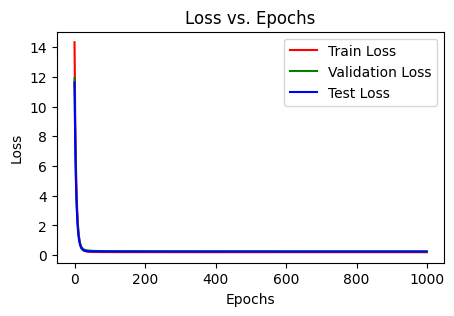

In [32]:
historicals = fit_linear_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-1, epochs=1000)
plot_model(historicals)

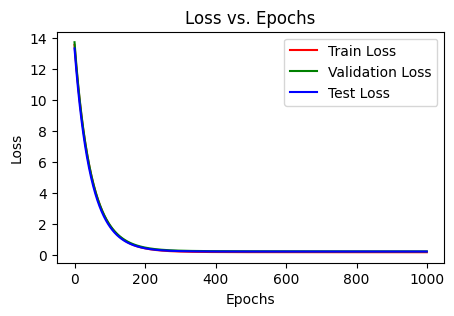

In [29]:
historicals = fit_linear_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-2, epochs=1000)
plot_model(historicals)

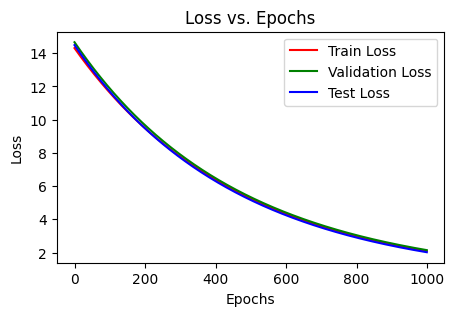

In [31]:
historicals = fit_linear_model(X_train, X_val, X_test, Y_train, Y_val, Y_test, lr=1e-3, epochs=1000)
plot_model(historicals)

### Conclusiones

